In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from honeybee_comb_inferer.inference import HoneyBeeCombInferer
from pathlib import Path
import segmentation_models_pytorch as smp
import cv2

In [4]:
root_dir = Path().cwd().resolve().parent.parent
print(root_dir)
image_path = root_dir / 'segmentation_restruct' / 'data' / 'comb_4.png'
image_path_2 = root_dir / 'segmentation_restruct' / 'data' / 'DSC_0841_1.JPG'
model_dir = root_dir  / 'models'
model_name = 'unet_effnetb0'
device = 'cuda'

C:\Users\sturmd\Documents\Development\Privates\honeybee_cells_segmentation_inference


In [5]:
model = model = HoneyBeeCombInferer(model_name=model_name, path_to_pretrained_models=model_dir, device=device)
pred = model.infer(image=str(image_path_2))
print(pred.shape)

(2607, 5461)


(<Figure size 3600x2800 with 2 Axes>,
 array([<Axes: title={'center': 'input image'}>,
        <Axes: title={'center': 'predicted'}>], dtype=object))

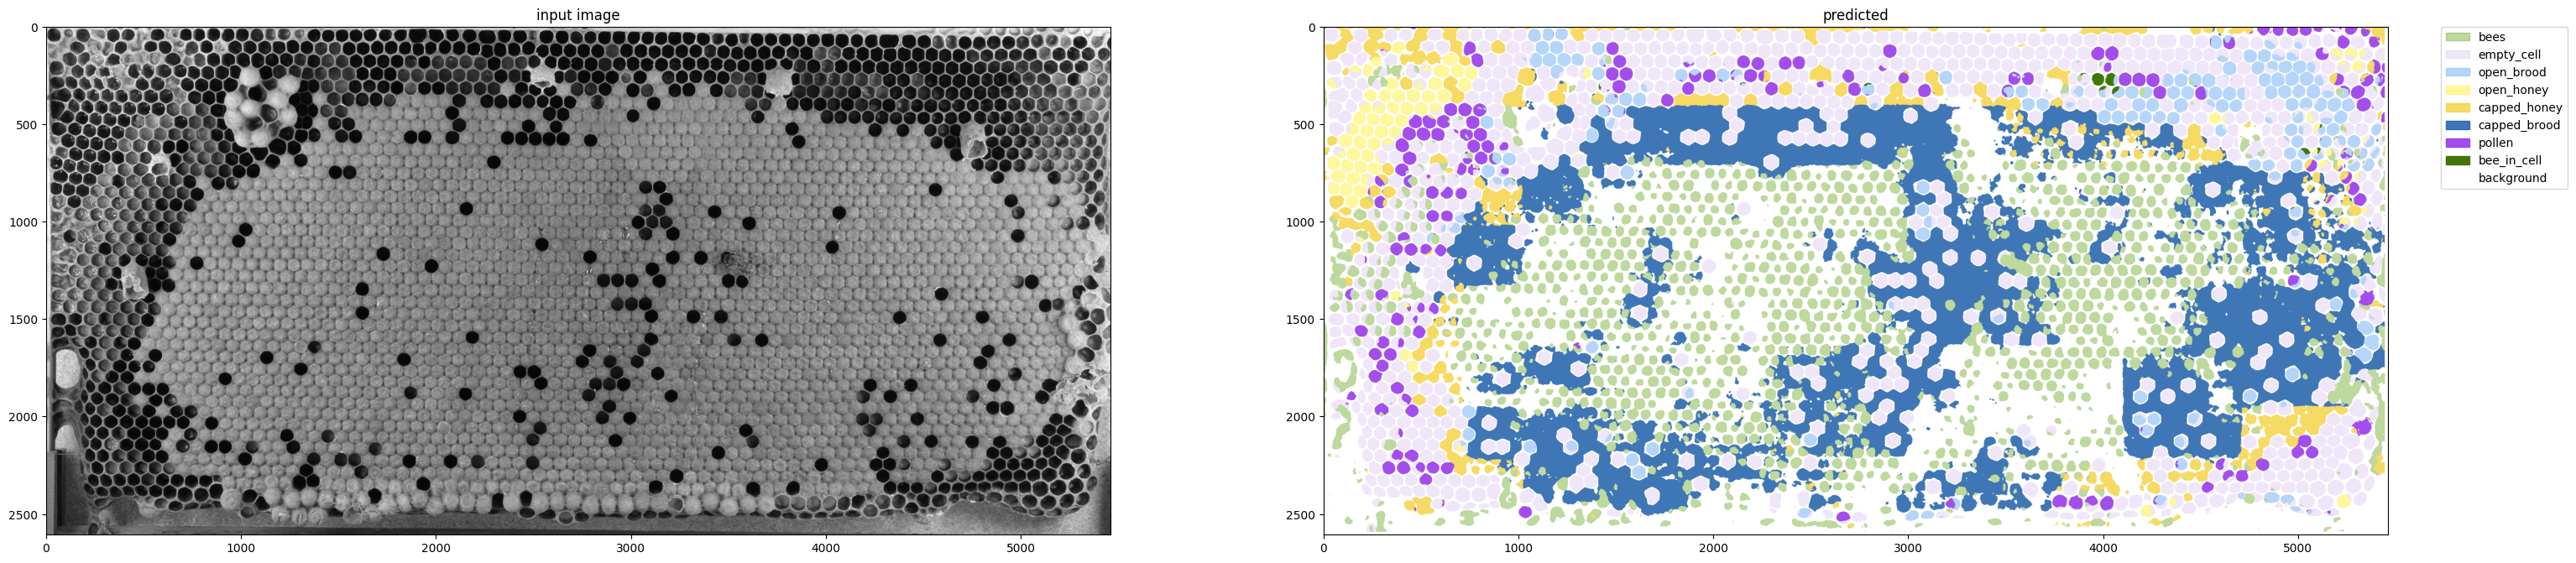

In [4]:
model.plot_prediction(pred, input_image=str(image_path_2))

In [14]:
from honeybee_comb_inferer.cell_counter import CellCounter

In [15]:
cell_counter = CellCounter(inferred_mask=pred, method = "edt")

In [16]:
cell_counter.run_counter()

Time taken:  13.851 sec.
Total number of cells: 3243


{'bees': 1201,
 'empty_cell': 812,
 'open_brood': 198,
 'open_honey': 82,
 'capped_honey': 285,
 'capped_brood': 478,
 'pollen': 170,
 'bee_in_cell': 17}

In [24]:
model = smp.Unet(encoder_name="efficientnet-b0", classes=9, in_channels=1)
model = smp.Unet(encoder_name="resnet18", classes=9, in_channels=1)
print(model)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\sturmd/.cache\torch\hub\checkpoints\resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:06<00:00, 7.18MB/s]


Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

(<Figure size 3600x2800 with 2 Axes>,
 array([<Axes: title={'center': 'input image'}>,
        <Axes: title={'center': 'predicted'}>], dtype=object))

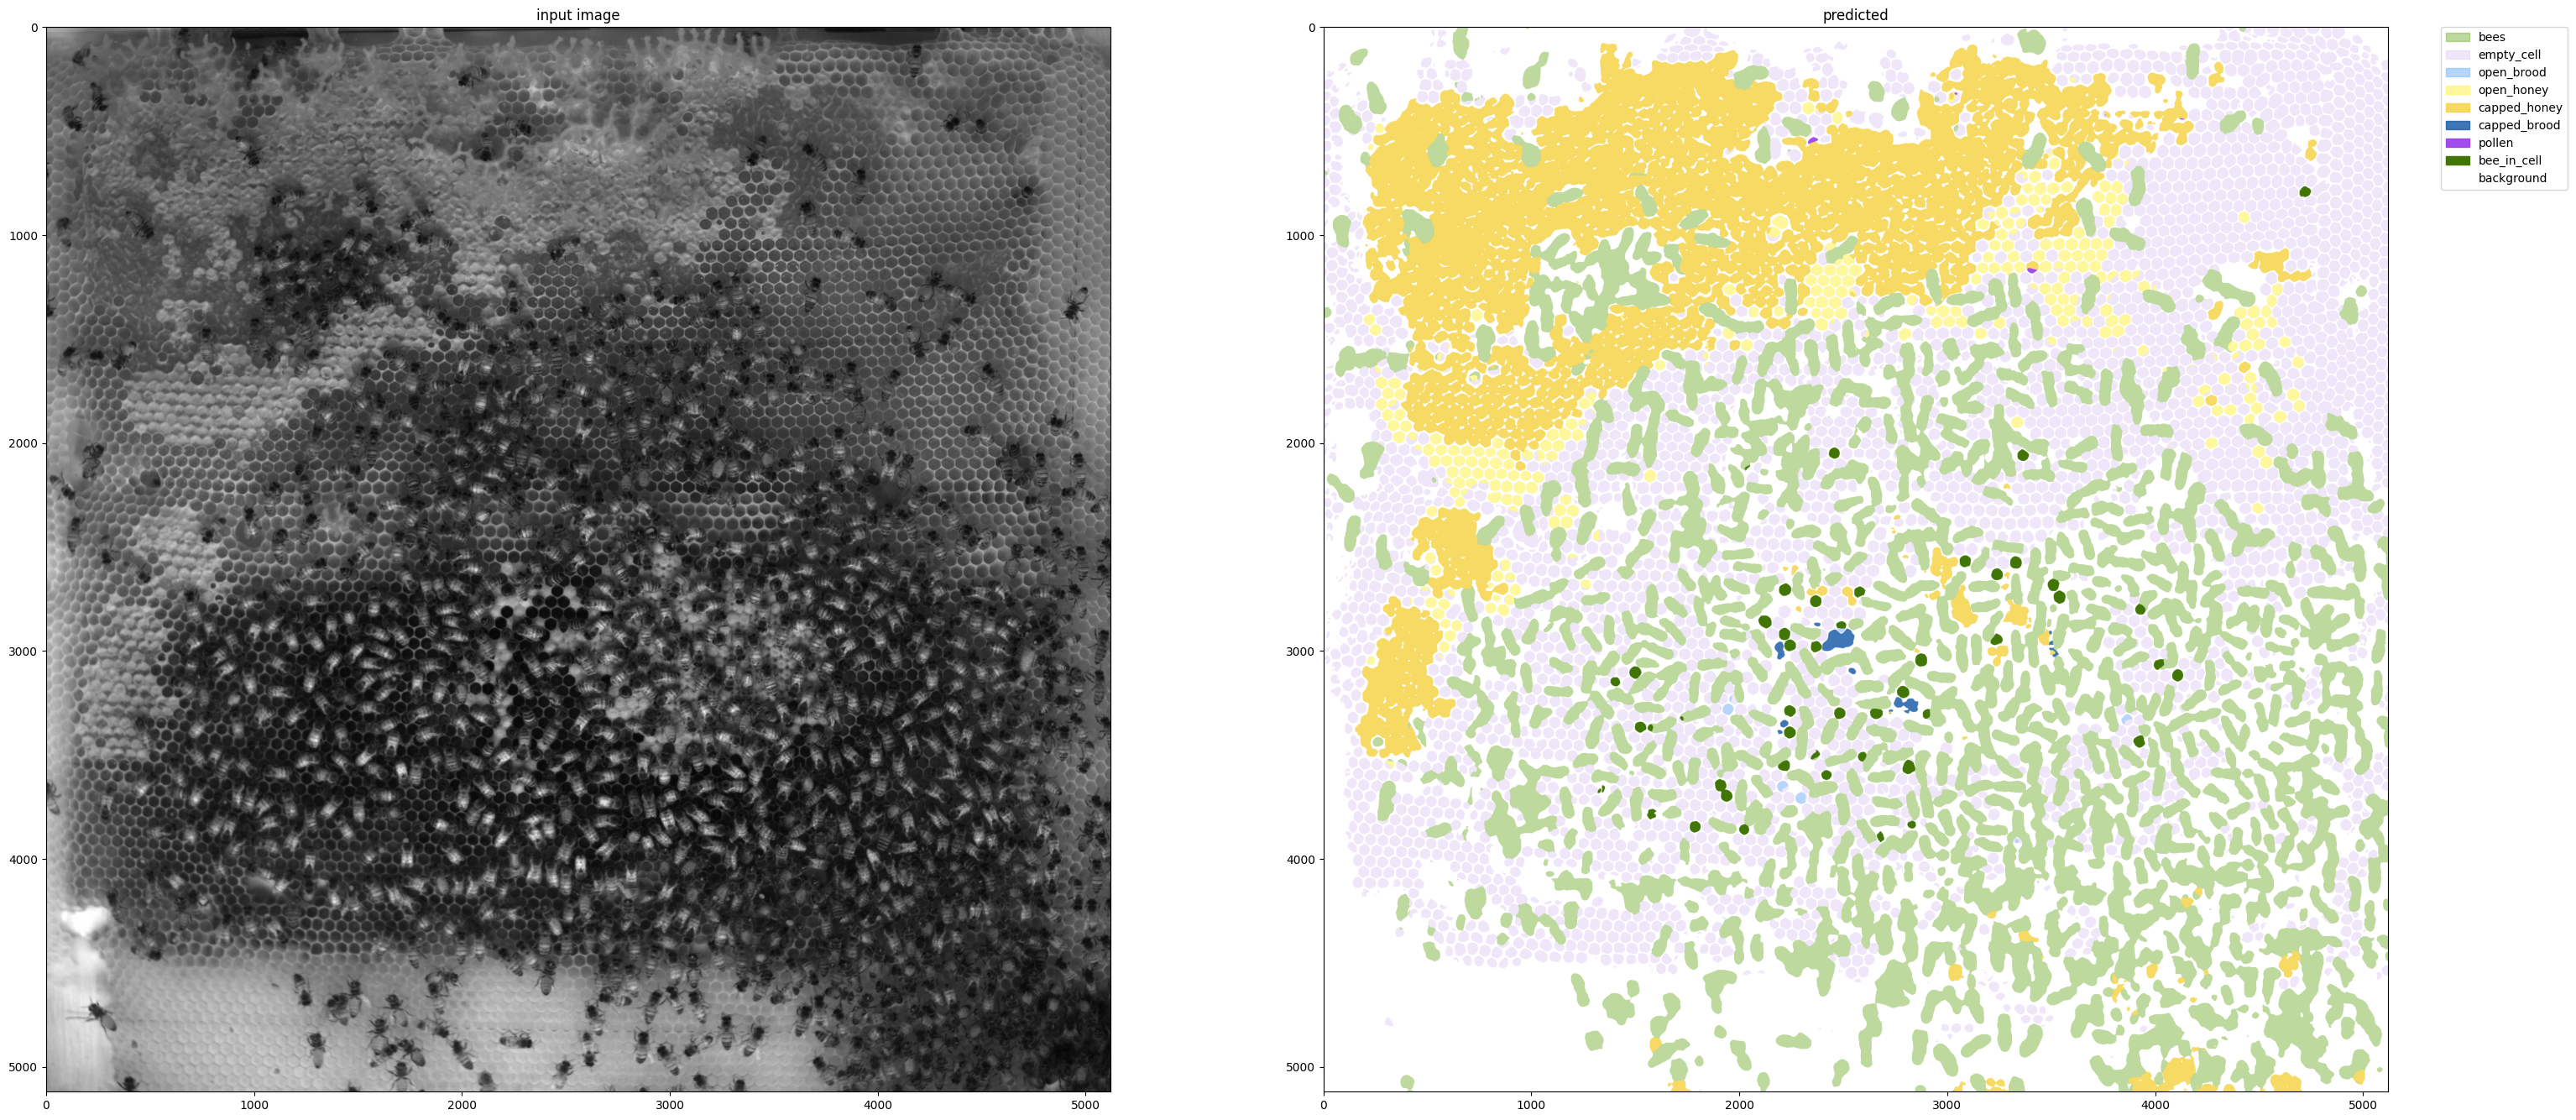

In [5]:
image_path = root_dir / 'segmentation_restruct' / 'data' / 'frame_30fps_001515.png'
model = model = HoneyBeeCombInferer(model_name=model_name, path_to_pretrained_models=model_dir, device=device)
pred = model.infer(image=str(image_path))
model.plot_prediction(pred, input_image=str(image_path))

In [12]:
bee_pixels = (pred==1) | (pred==8)
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img[bee_pixels] = 0
out_path = root_dir / 'segmentation_restruct' / 'data' / 'output'/ 'test_output.png'
cv2.imwrite(out_path, img)

True

In [20]:
single_img = Path("C:/Users/sturmd/Desktop/Bachelorarbeit/bee_data/20240529/cam-2/20240529T173150.816505.582Z.png")
pred = model.infer(image=str(single_img))

test at: 17:15:46


In [6]:
batch_path = Path("C:/Users/sturmd/Desktop/Bachelorarbeit/bee_data/20240529/cam-2")
print(batch_path)
# pred_batch = model.infer_batch(batch_path)

C:\Users\sturmd\Desktop\Bachelorarbeit\bee_data\20240529\cam-2
